In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/india-rain-agriculture-over-the-span-of-52-years/rain-agriculture.csv


## Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 2. Data Preparation and Cleaning


In [3]:
df = pd.read_csv("/kaggle/input/india-rain-agriculture-over-the-span-of-52-years/rain-agriculture.csv") 

In [4]:
print(df.shape)

(936, 85)


In [5]:
df.head()

,State Name,Year,Dist Code,State Code,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),WHEAT YIELD (Kg per ha),...,FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha),subdivision,YEAR,JUN,JUL,AUG,SEP
0,andhra pradesh,1966,49.0,1.0,218.272727,292.181818,1345.728182,0.227273,0.054545,128.417273,...,20.699091,0.017273,0.892727,11.688182,andhra pradesh,1966,72.333333,197.566667,145.966667,162.266667
1,andhra pradesh,1967,49.0,1.0,220.181818,302.090909,1337.355455,0.236364,0.045455,34.632727,...,19.797273,0.022727,0.960000,10.838182,andhra pradesh,1967,99.400000,205.100000,104.933333,134.900000
2,andhra pradesh,1968,49.0,1.0,203.527273,250.363636,1212.896364,0.327273,0.090909,146.831818,...,20.502727,0.012727,0.899091,9.487273,andhra pradesh,1968,61.366667,129.666667,28.900000,177.466667
3,andhra pradesh,1969,49.0,1.0,227.118182,280.509091,1268.754545,0.318182,0.081818,174.282727,...,20.974545,0.013636,1.020000,11.616364,andhra pradesh,1969,78.233333,168.800000,137.033333,122.566667
4,andhra pradesh,1970,49.0,1.0,225.745455,312.245455,1361.693636,0.245455,0.209091,549.586364,...,20.752727,0.011818,1.006364,10.207273,andhra pradesh,1970,125.833333,121.433333,242.300000,140.200000


In [6]:
df['State Name'].unique()

array(['andhra pradesh', 'assam', 'bihar', 'gujarat', 'haryana',
       'himachal pradesh', 'jharkhand', 'karnataka', 'kerala',
       'madhya pradesh', 'maharashtra', 'orissa', 'punjab', 'rajasthan',
       'tamil nadu', 'uttar pradesh', 'uttarakhand', 'west bengal'],
      dtype=object)

# 🌾 Rain-Agriculture Dataset Overview

This dataset combines **agricultural statistics** (area, production, yield) with **rainfall data** for various Indian states and years. It provides an opportunity to analyze the impact of monsoon rainfall on crop yields, particularly for rice, wheat, and other key crops.

---

## 📁 Dataset Structure

| Column Category | Example Columns | Description |
|-----------------|------------------|-------------|
| 📍 Location Info | `State Name`, `subdivision`, `Dist Code`, `State Code` | Geographic identification of data records. |
| 📅 Temporal Info | `Year`, `YEAR` | Year of observation (1966–2017). |
| 🌧️ Rainfall Data | `JUN`, `JUL`, `AUG`, `SEP` | Monthly average rainfall (in mm) during the monsoon season. |
| 🌾 Crop Area | `RICE AREA (1000 ha)`, `WHEAT AREA`, ... | Total area cultivated for each crop (in 1000 hectares). |
| 📦 Crop Production | `RICE PRODUCTION (1000 tons)`, `MAIZE PRODUCTION`, ... | Total crop production in 1000 tons. |
| 📈 Crop Yield | `RICE YIELD (Kg per ha)`, `COTTON YIELD`, ... | Yield per hectare (productivity) in kilograms. |
| 🥗 Horticulture | `FRUITS AREA`, `VEGETABLES AREA` | Area cultivated for fruits and vegetables. |

---

In [7]:
# Analyze the dataset on WHEAT

In [8]:
wheat_columns = ['WHEAT AREA (1000 ha)', 'WHEAT PRODUCTION (1000 tons)', 'WHEAT YIELD (Kg per ha)']
rainfall_columns = ['JUN', 'JUL', 'AUG', 'SEP']
other_features = ['Year','State Name']
selected_columns = wheat_columns + rainfall_columns + other_features

In [9]:

df_wheat = df[
    (df['WHEAT YIELD (Kg per ha)'] > 0) &
    (df['WHEAT AREA (1000 ha)'] > 0) &
    (df['WHEAT PRODUCTION (1000 tons)'] > 0)
]

In [10]:
df_wheat.head()

,State Name,Year,Dist Code,State Code,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),WHEAT YIELD (Kg per ha),...,FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha),subdivision,YEAR,JUN,JUL,AUG,SEP
0,andhra pradesh,1966,49.0,1.0,218.272727,292.181818,1345.728182,0.227273,0.054545,128.417273,...,20.699091,0.017273,0.892727,11.688182,andhra pradesh,1966,72.333333,197.566667,145.966667,162.266667
1,andhra pradesh,1967,49.0,1.0,220.181818,302.090909,1337.355455,0.236364,0.045455,34.632727,...,19.797273,0.022727,0.960000,10.838182,andhra pradesh,1967,99.400000,205.100000,104.933333,134.900000
2,andhra pradesh,1968,49.0,1.0,203.527273,250.363636,1212.896364,0.327273,0.090909,146.831818,...,20.502727,0.012727,0.899091,9.487273,andhra pradesh,1968,61.366667,129.666667,28.900000,177.466667
3,andhra pradesh,1969,49.0,1.0,227.118182,280.509091,1268.754545,0.318182,0.081818,174.282727,...,20.974545,0.013636,1.020000,11.616364,andhra pradesh,1969,78.233333,168.800000,137.033333,122.566667
4,andhra pradesh,1970,49.0,1.0,225.745455,312.245455,1361.693636,0.245455,0.209091,549.586364,...,20.752727,0.011818,1.006364,10.207273,andhra pradesh,1970,125.833333,121.433333,242.300000,140.200000


In [11]:
df_wheat_cleaned = df_wheat[selected_columns].copy()

In [12]:
df_wheat_cleaned.head()

,WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),WHEAT YIELD (Kg per ha),JUN,JUL,AUG,SEP,Year,State Name
0,0.227273,0.054545,128.417273,72.333333,197.566667,145.966667,162.266667,1966,andhra pradesh
1,0.236364,0.045455,34.632727,99.400000,205.100000,104.933333,134.900000,1967,andhra pradesh
2,0.327273,0.090909,146.831818,61.366667,129.666667,28.900000,177.466667,1968,andhra pradesh
3,0.318182,0.081818,174.282727,78.233333,168.800000,137.033333,122.566667,1969,andhra pradesh
4,0.245455,0.209091,549.586364,125.833333,121.433333,242.300000,140.200000,1970,andhra pradesh


In [13]:
df = df_wheat_cleaned.copy()

In [14]:
 df.isna().sum().sum() # there is no any null value

0

## 3. Analyzing and visualization

<Axes: xlabel='Year'>

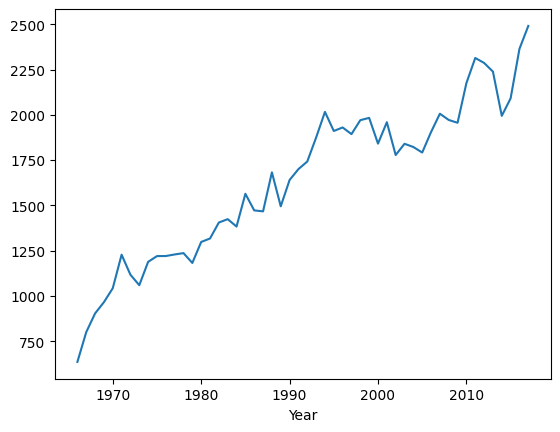

In [15]:
df.groupby('Year')['WHEAT YIELD (Kg per ha)'].mean().plot()
# How wheat yield was changes over the year



<Axes: ylabel='State Name'>

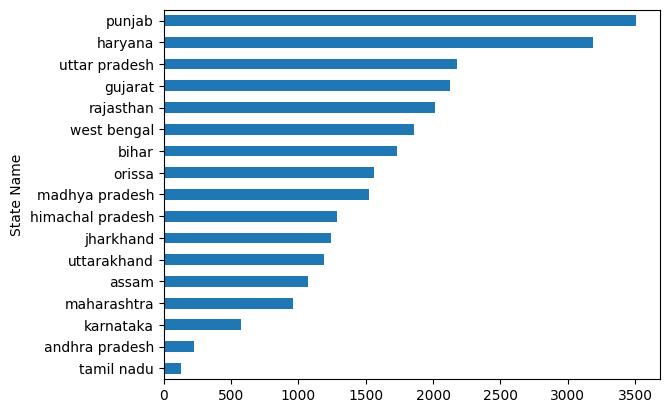

In [16]:
#Goal: Identify high-yielding and low-yielding states.
df.groupby('State Name')['WHEAT YIELD (Kg per ha)'].mean().sort_values().plot(kind='barh')

### As we can see,punjab has most wheat yield in punjab and least wheat yield is in tamilNadu and kerala in last years 

<Axes: >

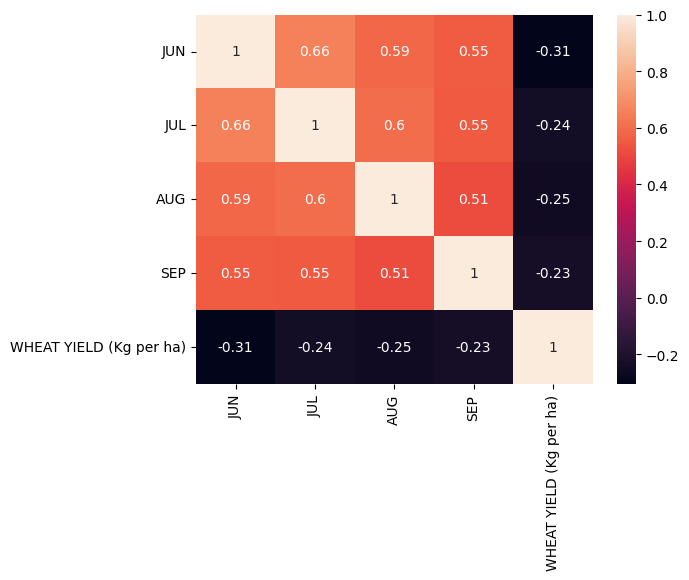

In [17]:
# Goal is to find which rainfall month affect the most wheat yield
sns.heatmap(df[['JUN', 'JUL', 'AUG', 'SEP', 'WHEAT YIELD (Kg per ha)']].corr(), annot=True)


### Here we can see the heatmap ( correlation matrix) :
###  in which AUGUST has -0.19 correlation with wheat yield means there is minimal impact of rainfall on wheat yield in AUGUST
### In JUNE has -0.35 means moderate effect but most affect the yield of wheat

In [18]:
df.columns

Index(['WHEAT AREA (1000 ha)', 'WHEAT PRODUCTION (1000 tons)',
       'WHEAT YIELD (Kg per ha)', 'JUN', 'JUL', 'AUG', 'SEP', 'Year',
       'State Name'],
      dtype='object')

<Axes: xlabel='JUN', ylabel='WHEAT YIELD (Kg per ha)'>

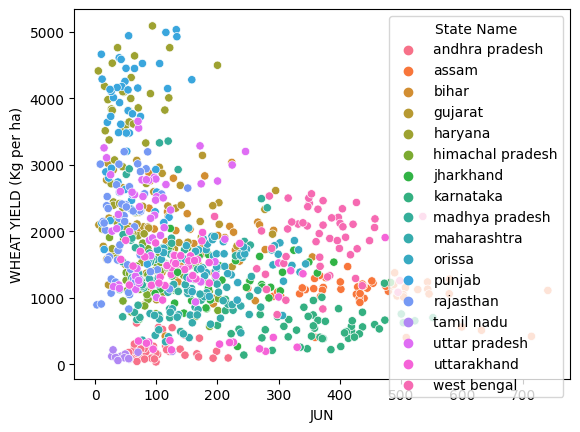

In [19]:
#  Visualize relationship between each month's rainfall and yield.
sns.scatterplot(data= df , x= 'JUN' , y = "WHEAT YIELD (Kg per ha)" , hue = 'State Name')

<Axes: xlabel='WHEAT AREA (1000 ha)', ylabel='WHEAT YIELD (Kg per ha)'>

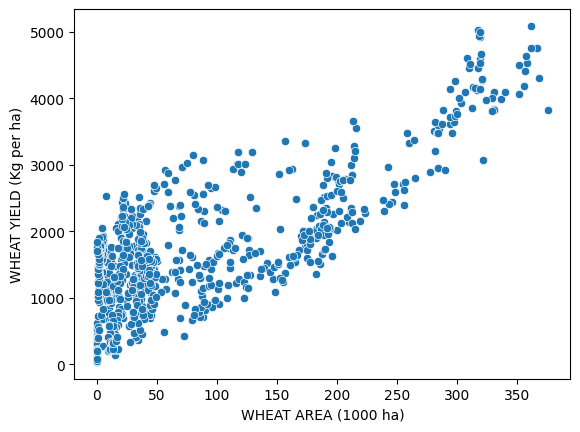

In [20]:
sns.scatterplot(x='WHEAT AREA (1000 ha)', y='WHEAT YIELD (Kg per ha)', data=df)



<Axes: xlabel='WHEAT PRODUCTION (1000 tons)', ylabel='WHEAT YIELD (Kg per ha)'>

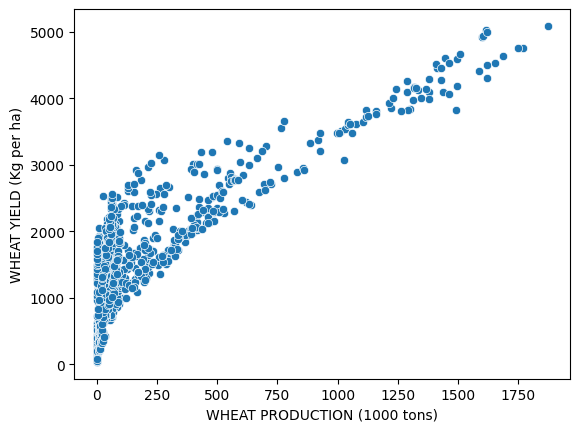

In [21]:

sns.scatterplot(x='WHEAT PRODUCTION (1000 tons)', y='WHEAT YIELD (Kg per ha)', data=df)



### It can be seen that yield is depend on Area of field that is directly related to prodcution ( area is huge production would be huge, depending on yield)

<Axes: xlabel='State Name'>

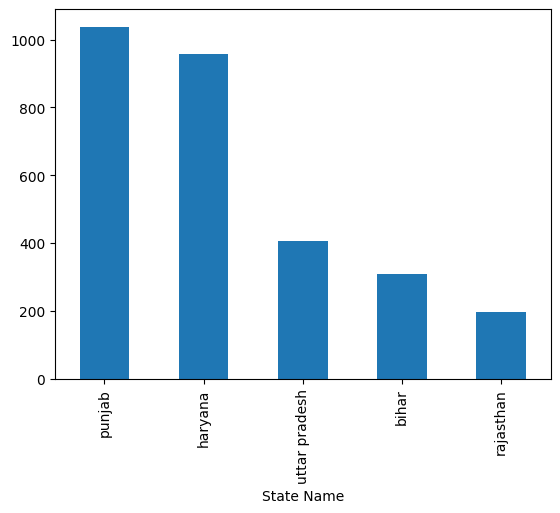

In [22]:
# Top 5 state on wheat production 
df.groupby('State Name')['WHEAT PRODUCTION (1000 tons)'].mean().sort_values(ascending=False).head(5).plot(kind='bar')


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='WHEAT YIELD (Kg per ha)', ylabel='Count'>

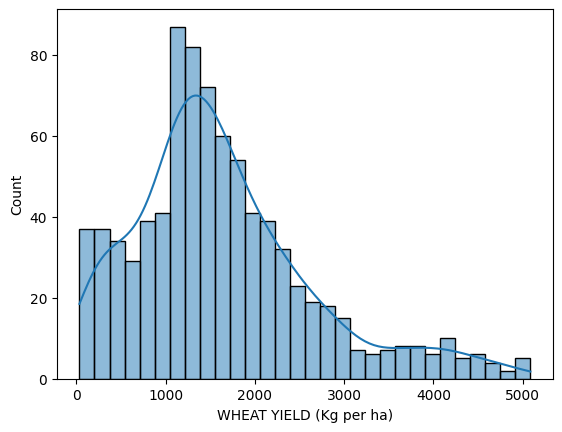

In [23]:
sns.histplot(df['WHEAT YIELD (Kg per ha)'], bins=30, kde=True)

### it can be seen that wheat yield is around 1500 kg per ha happens on most of states

## 4. Model training

### To build a Machine Learning model that predicts Wheat Yield (Kg per ha) using features like:
### Rainfall in monsoon months (JUN, JUL, AUG, SEP)

### WHEAT AREA, WHEAT PRODUCTION

### Year, State Name

### 4 (i)  Feature Selection

 ### 4 (ii). Data Preprocessing
 ### Label Encoding was applied to convert State Name into numeric form.

 ### Dataset was split into training and testing sets using train_test_split.

In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Label encoding
le = LabelEncoder()
df['State Name'] = le.fit_transform(df['State Name'])

# Define features and target
X = df[['WHEAT AREA (1000 ha)', 'WHEAT PRODUCTION (1000 tons)', 'JUN', 'JUL', 'AUG', 'SEP', 'Year', 'State Name']]
y = df['WHEAT YIELD (Kg per ha)']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
#  4 (iii) . Model Selection: XGBoost Regressor
# XGBoost was chosen because:

# It's highly accurate and efficient

# Handles numeric and categorical features well

# Performs automatic feature selection

import xgboost as xgb

model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [26]:
#  4.(iv) Model Evaluation
# We evaluate the model using:

# Root Mean Squared Error (RMSE): Measures average prediction error

# R² Score: Explains how much variance in yield is explained by the model
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


RMSE: 162.83
R² Score: 0.97


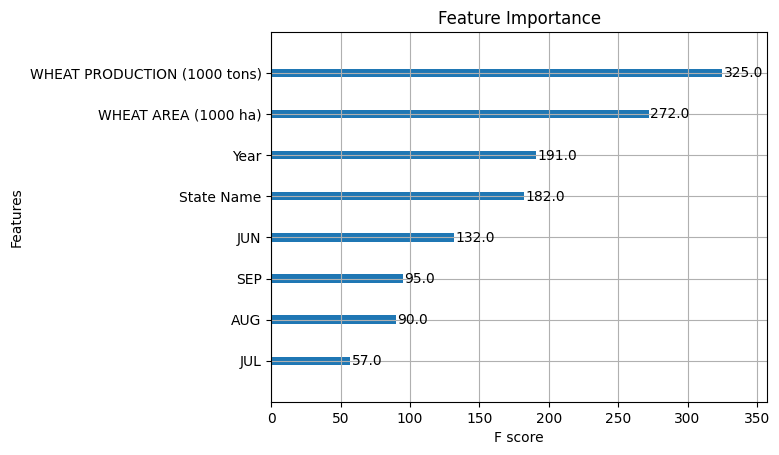

In [27]:
import matplotlib.pyplot as plt
xgb.plot_importance(model)
plt.title("Feature Importance")
plt.show()
